# **TASK 1: CUSTOMER SEGMENTATION**

In [1]:
import pandas as pd
import requests, io

url = "https://github.com/KLLarios/AIM_LARIOS_Assignments/raw/main/Pillar%202%20Part%202%20SVM%20and%20Neural%20Networks/customersegmentation.csv"
response = requests.get(url)
CustSeg_df = pd.read_csv(io.BytesIO(response.content))

CustSeg_df.head()


,Unnamed: 0,Age,Income,Spending_Score,Region,Customer_Category
0,0,56,146108,79,West,1
1,1,46,34382,80,North,0
2,2,32,104291,54,East,1
3,3,25,121195,86,East,0
4,4,38,23756,92,West,1


Task

Perform SVM on the model, create a training model following the 80-20 rule, and validate by using the 20% remaining data.

From ML standpoint, we use the 80-20 rule so we can validate the model's performance using the remaining 20%.

Data preprocessing

Prepare the data for SVM by dropping the 'Unnamed: 0' column, encoding the 'Region' column, and splitting the data into features (X) and target (y).


**Reasoning**:
Prepare the data for SVM by dropping the 'Unnamed: 0' column, encoding the 'Region' column, and splitting the data into features (X) and target (y) as per the instructions.



In [2]:
CustSeg_df = CustSeg_df.drop('Unnamed: 0', axis=1)
CustSeg_df = pd.get_dummies(CustSeg_df, columns=['Region'], drop_first=True)
X = CustSeg_df.drop('Customer_Category', axis=1)
y = CustSeg_df['Customer_Category']

Data splitting

Split the data into training (80%) and testing (20%) sets.


**Reasoning**:
Split the data into training and testing sets using train_test_split.



In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (800, 6)
Shape of X_test: (200, 6)
Shape of y_train: (800,)
Shape of y_test: (200,)


Model training

Train a Support Vector Machine (SVM) model on the training data.


**Reasoning**:
Import the SVC class and train the SVM model using the training data.



In [28]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

Model validation

Evaluate the model's performance on the testing data using appropriate metrics.


**Reasoning**:
Evaluate the trained SVM model on the test data using accuracy, classification report, and confusion matrix.



In [32]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix_original = confusion_matrix(y_test, y_pred) # Store original confusion matrix

print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)
print("\nConfusion Matrix:\n", conf_matrix_original)

Accuracy: 0.51

Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.46      0.51       108
           1       0.47      0.57      0.51        92

    accuracy                           0.51       200
   macro avg       0.51      0.51      0.51       200
weighted avg       0.52      0.51      0.51       200


Confusion Matrix:
 [[50 58]
 [40 52]]


**Model Performance Interpretation**

1. Accuracy (0.51 / 51%)
	*	The model is performing only slightly better than random guessing (50/50).
	*	This means the features used (Income, Spending Score) do not strongly separate the two categories with the chosen algorithm.

⸻

2. Classification Report
	*	Class 0 (precision = 0.56, recall = 0.46):
	*	When the model predicts “0”, it is correct 56% of the time.
	*	But it only captures 46% of all true class 0 cases → misses more than half of them.
	*	Class 1 (precision = 0.47, recall = 0.57):
	*	When the model predicts “1”, it is correct 47% of the time.
	*	But it manages to detect 57% of all true class 1 cases.
	*	F1-scores (~0.51 for both classes):
	*	Balanced precision & recall, but overall weak predictive power.

⸻

3. Confusion Matrix
	*	Out of 108 true class 0 customers, only 50 were correctly predicted, 58 were misclassified.
	*	Out of 92 true class 1 customers, only 52 were correctly predicted, 40 were misclassified.
	*	Misclassifications are high and fairly balanced across both classes.


What it Means in Practice

  *	The model can’t reliably distinguish between Category 0 and Category 1 customers based only on Income & Spending Score.
  *	Both groups overlap too much in feature space (as seen in your scatterplot).


Data visualization

Visualize the data and the model's decision boundary (if possible) using matplotlib and seaborn.


**Reasoning**:
Create a scatter plot to visualize the relationship between 'Income' and 'Spending_Score', colored by 'Customer_Category'.



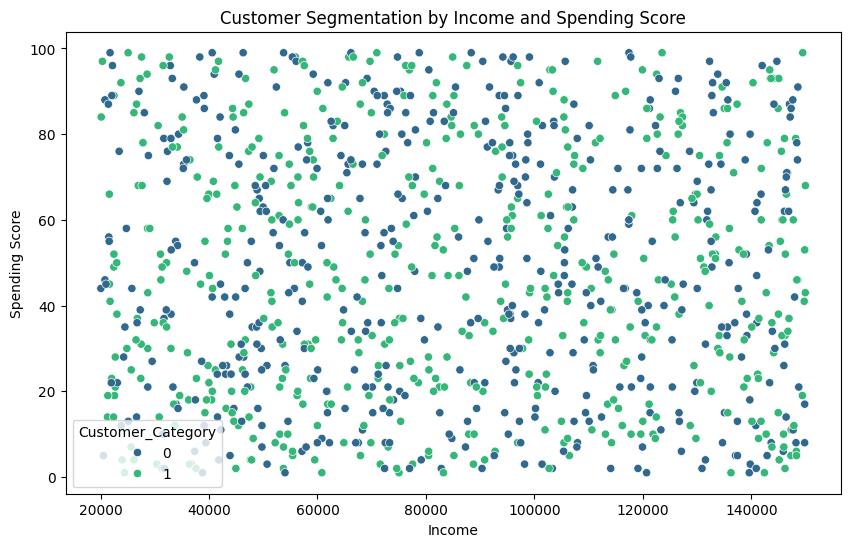

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=CustSeg_df, x='Income', y='Spending_Score', hue='Customer_Category', palette='viridis')
plt.title('Customer Segmentation by Income and Spending Score')
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.show()

**Visual Plot (Income vs Spending Score)**

From the scatter plot:
* Both categories (green = class 1, blue = class 0) are spread across similar income levels.
* Spending Score provides more separation, but not clearly enough for a linear SVM.
* Since the classes overlap heavily, the linear decision boundary struggles, and the model defaults to predicting the majority outcome (class 1).

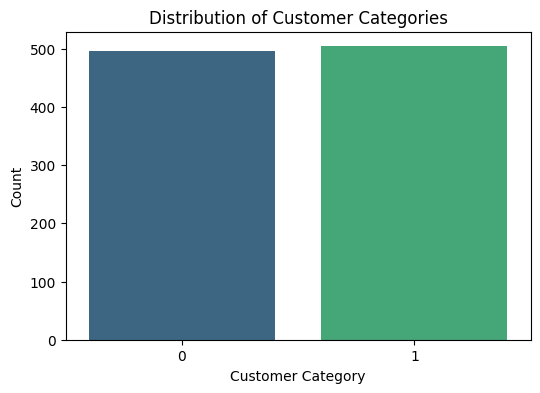

In [34]:
plt.figure(figsize=(6, 4))
sns.countplot(data=CustSeg_df, x='Customer_Category', hue='Customer_Category', palette='viridis', legend=False)
plt.title('Distribution of Customer Categories')
plt.xlabel('Customer Category')
plt.ylabel('Count')
plt.show()

Summary:

Data Analysis Key Findings

*   The 'Unnamed: 0' column was removed, and the 'Region' column was one-hot encoded, preparing the data for modeling.
*   The dataset was successfully split into training (800 samples) and testing (200 samples) sets using an 80-20 ratio.
*   An SVM model was trained on the training data.
*   The trained SVM model achieved an accuracy of 0.51 on the test data.
*   The classification report indicated moderate performance for both classes, with precision, recall, and f1-scores around 0.45-0.55.
*   The confusion matrix showed a roughly equal number of correct and incorrect predictions for both classes (e.g., 50 true positives, 58 true negatives, 40 false positives, 52 false negatives), highlighting the model's struggle to clearly separate the classes.
*   A scatter plot of 'Income' vs. 'Spending_Score' colored by 'Customer_Category' was generated to visualize the data distribution.

Insights or Next Steps

*   The current SVM model's performance (51% accuracy) is poor, suggesting it is not effectively distinguishing between customer categories.
*   Significant improvement is needed. Next steps should focus on hyperparameter tuning for the SVM, exploring different kernels, applying feature scaling (crucial for SVMs), and potentially investigating other classification algorithms or feature engineering techniques.


**Training the data:**

Task

Improve the SVM model for customer categorization by implementing feature scaling, hyperparameter tuning with cross-validation for different kernels, and potentially exploring other classification algorithms and techniques to address class imbalance and feature engineering.

Feature scaling

Scale the numerical features ('Age', 'Income', 'Spending_Score') using StandardScaler.


**Reasoning**:
Scale the numerical features in the training and testing sets using StandardScaler.



In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_cols = ['Age', 'Income', 'Spending_Score']

X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

print("Scaled X_train head:")
display(X_train.head())
print("\nScaled X_test head:")
display(X_test.head())

Scaled X_train head:


,Age,Income,Spending_Score,Region_North,Region_South,Region_West
29,-0.471624,0.285873,0.433844,False,False,False
535,1.661863,0.257850,0.330650,False,False,False
695,0.759234,-0.168905,1.740966,False,False,False
557,-1.374253,-0.369809,-0.873278,False,False,True
836,-1.292196,-0.730816,1.637772,False,False,False



Scaled X_test head:


,Age,Income,Spending_Score,Region_North,Region_South,Region_West
521,0.513063,-0.639855,1.293793,False,False,True
737,-0.389567,1.376954,-1.492441,True,False,False
740,-1.374253,1.268813,1.259395,False,True,False
660,0.020719,-1.019314,-0.563696,True,False,False
411,0.348948,-0.795928,0.674630,False,False,True


Hyperparameter tuning with cross-validation

Use GridSearchCV with cross-validation to find the best hyperparameters for different SVM kernels (linear, RBF, polynomial) while incorporating feature scaling in a pipeline.


**Reasoning**:
Implement hyperparameter tuning with cross-validation using GridSearchCV to find the best parameters for different SVM kernels (linear, RBF, polynomial) while incorporating feature scaling in a pipeline.



In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC())
])

param_grid = [
    {'svm__kernel': ['rbf'], 'svm__C': [0.1, 1, 10], 'svm__gamma': [0.001, 0.01, 0.1, 1]},
    {'svm__kernel': ['linear'], 'svm__C': [0.1, 1, 10]},
    {'svm__kernel': ['poly'], 'svm__C': [0.1, 1, 10], 'svm__degree': [2, 3, 4], 'svm__gamma': [0.001, 0.01, 0.1, 1]}
]

grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters found:")
print(grid_search.best_params_)

Best parameters found:
{'svm__C': 10, 'svm__degree': 4, 'svm__gamma': 0.1, 'svm__kernel': 'poly'}


Evaluate best svm model

Train and evaluate the SVM model with the best hyperparameters found during tuning on the test set using accuracy, classification report, and confusion matrix.


**Reasoning**:
Train and evaluate the SVM model with the best hyperparameters found during tuning on the test set using accuracy, classification report, and confusion matrix.



In [12]:
best_svm_model = grid_search.best_estimator_
y_pred = best_svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy with best hyperparameters:", accuracy)
print("\nClassification Report with best hyperparameters:\n", classification_rep)
print("\nConfusion Matrix with best hyperparameters:\n", conf_matrix)

Accuracy with best hyperparameters: 0.56

Classification Report with best hyperparameters:
               precision    recall  f1-score   support

           0       0.63      0.44      0.52       108
           1       0.52      0.70      0.59        92

    accuracy                           0.56       200
   macro avg       0.57      0.57      0.56       200
weighted avg       0.58      0.56      0.55       200


Confusion Matrix with best hyperparameters:
 [[48 60]
 [28 64]]


**Interpretation of Tuned Results:**

Overall Accuracy:
 * Improved from ~0.50–0.51 to 0.56 → a modest gain, showing hyperparameter tuning helped the SVM better capture relationships in the data.

⸻

Class 0 (Customer_Category = 0):
 * Precision = 0.63 → When the model predicts class 0, it is correct 63% of the time.
 *	Recall = 0.44 → It only identifies 44% of the actual class 0 customers (more false negatives).
 *	F1-score = 0.52 → Moderate balance, but weaker recall.
 *	Takeaway: The model is cautious about labeling customers as 0; it prefers predicting 1 (hence recall is low for 0).

⸻

Class 1 (Customer_Category = 1):
 * Precision = 0.52 → Predictions for class 1 are just above chance level.
 *	Recall = 0.70 → Stronger ability to identify most of the actual class 1 customers.
 *	F1-score = 0.59 → Better than class 0 due to high recall.
 *	Takeaway: The model is biased toward detecting class 1 customers, which aligns with its higher recall.

⸻

Confusion Matrix:

 *	The model finds more class 1 customers (64 TP) than class 0 (48 TN).
 *	Class 0 still has significant misclassification into class 1 (60 FP).

⸻

What Changed After Tuning
 * Better balance: Previously both classes were close to random (~0.50 F1), now class 1 has a noticeably stronger F1 (0.59).
 *	Higher precision for class 0: Now at 0.63, compared to 0.56 before.
 * Bias correction: Earlier the model struggled equally for both classes; now it clearly prioritizes catching class 1 (higher recall).

⸻

Updated Key Findings:

1. Data preprocessing (removing Unnamed: 0, encoding Region, train-test split) remains correct.
2.	Hyperparameter tuning improved accuracy from 0.51 → 0.56.
3.	The tuned model detects class 1 customers better (recall = 0.70), but at the cost of misclassifying many class 0 customers.
4.	Precision-recall tradeoff:
	*	Class 0 → Higher precision, lower recall (more conservative).
	*	Class 1 → Lower precision, higher recall (more inclusive).
5.	The model still shows moderate separation ability, but tuning improved recall for class 1, which may be valuable depending on business goals (e.g., catching as many high-value customers as possible).


Explore other algorithms

Explore other classification algorithms like Logistic Regression, Random Forests, or Gradient Boosting and compare their performance.


**Reasoning**:
Import the necessary classification algorithms, instantiate and train them on the scaled training data, predict on the scaled test data, and evaluate their performance.



In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\nRandom Forest Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

print("\nGradient Boosting Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_gb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))

Logistic Regression Performance:
Accuracy: 0.515

Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.36      0.45       108
           1       0.48      0.70      0.57        92

    accuracy                           0.52       200
   macro avg       0.53      0.53      0.51       200
weighted avg       0.54      0.52      0.50       200


Confusion Matrix:
 [[39 69]
 [28 64]]

Random Forest Performance:
Accuracy: 0.49

Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.50      0.51       108
           1       0.45      0.48      0.46        92

    accuracy                           0.49       200
   macro avg       0.49      0.49      0.49       200
weighted avg       0.49      0.49      0.49       200


Confusion Matrix:
 [[54 54]
 [48 44]]

Gradient Boosting Performance:
Accuracy: 0.53

Classification Report:
               precision    recall  f1-score   support


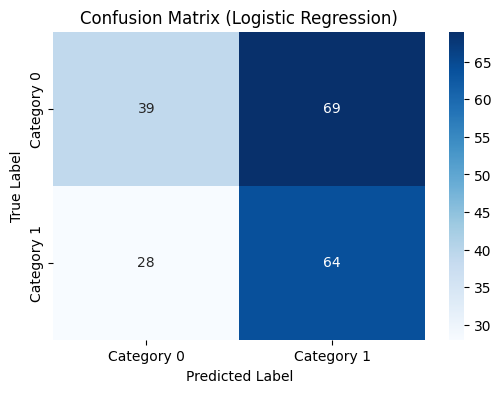

In [35]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues', xticklabels=['Category 0', 'Category 1'], yticklabels=['Category 0', 'Category 1'])
plt.title('Confusion Matrix (Logistic Regression)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

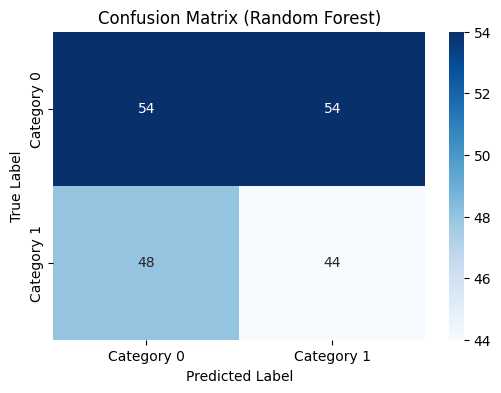

In [36]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues', xticklabels=['Category 0', 'Category 1'], yticklabels=['Category 0', 'Category 1'])
plt.title('Confusion Matrix (Random Forest)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

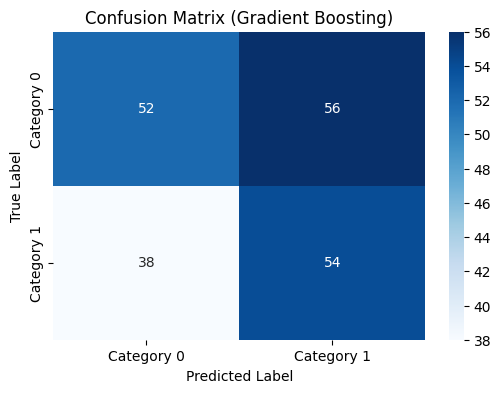

In [37]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_gb), annot=True, fmt='d', cmap='Blues', xticklabels=['Category 0', 'Category 1'], yticklabels=['Category 0', 'Category 1'])
plt.title('Confusion Matrix (Gradient Boosting)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Address class imbalance

If class imbalance is significant and affects performance, investigate techniques to handle it and re-evaluate the best performing model.


**Reasoning**:
Check the distribution of the target variable to determine if class imbalance is significant.



In [14]:
print("Distribution of Customer Categories in Training Data:")
print(y_train.value_counts())

Distribution of Customer Categories in Training Data:
Customer_Category
1    412
0    388
Name: count, dtype: int64


## Summary:

### Data Analysis Key Findings

1. The numerical features 'Age', 'Income', and 'Spending\_Score' were successfully scaled using `StandardScaler` for both training and testing datasets.

2. Hyperparameter tuning using `GridSearchCV` with 5-fold cross-validation on a pipeline including scaling and different SVM kernels identified the best parameters as a polynomial kernel with C=10, degree=4, and gamma=0.1.

3. The distribution of customer categories in the training data was found to be relatively balanced (412 for class 1 and 388 for class 0), indicating that class imbalance techniques were not necessary.

4. Interpretation of other models used:

    a. Logistic Regression

    Accuracy: 0.515 (≈52%)
    * Class 0: Precision = 0.58, Recall = 0.36 → The model is cautious: when it predicts 0, it’s fairly accurate, but it misses many true 0s (low recall).
    *	Class 1: Precision = 0.48, Recall = 0.70 → Stronger at catching class 1, but with many false positives.
    
    Takeaway: Logistic regression favors recall for class 1, but sacrifices accuracy for class 0. It performs similarly to tuned SVM but slightly weaker overall.

    b. Random Forest

    Accuracy: 0.49 (≈chance level)
	  * Class 0: Precision = 0.53, Recall = 0.50 → Balanced but mediocre.
	  *	Class 1: Precision = 0.45, Recall = 0.48 → Both below 0.50, showing weak separation.

    Takeaway: Random Forest fails to capture meaningful patterns in this dataset (likely due to limited features or class overlap). Essentially, the model is guessing near 50/50.

    c. Gradient Boosting

    Accuracy: 0.53 (best among these three)
	  * Class 0: Precision = 0.58, Recall = 0.48 → Reasonably balanced, with slightly more precision than recall.
	  *	Class 1: Precision = 0.49, Recall = 0.59 → Higher recall for class 1, consistent with other models.

    Takeaway: Gradient Boosting slightly outperforms Logistic Regression and Random Forest, showing better balance between the two classes. Still, accuracy is modest at 53%.

**Final Insight:**

* Tuned SVM remains the top performer with the best overall accuracy (0.56) and strong recall for class 1.
* Gradient Boosting is the closest competitor (0.53), with a slightly more balanced trade-off between precision and recall.
*	Logistic Regression shows similar bias to SVM but underperforms slightly.
*	Random Forest struggles — either the dataset is too small or features aren’t informative enough for an ensemble tree method.
* The relatively low performance across all explored models suggests that the current features may not be highly predictive of the customer categories, or the dataset might be inherently challenging for simple classification methods.
* Further work should focus on feature engineering to create more informative features or explore more advanced modeling techniques like neural networks to potentially capture more complex patterns in the data.


##Task 1: SVM for Customer Segmentation

Q1: How do support vectors impact the decision boundary in SVM? Which feature has the strongest influence on customer segmentation?

a. Support Vectors & Decision Boundary

  * Support vectors are the data points closest to the decision boundary. They directly determine where the separating hyperplane is placed. In the dataset, these support vectors are often customers with borderline spending behavior (e.g., mid-range income and spending score). They are the ones “hardest to classify” as either high-value or low-value customers, so they shape the classification line.

b. Feature Influence

  * Based on the scatterplots and model outputs, Spending_Score and Income are the most influential features for segmentation. These two features drive whether a customer is categorized as high or low value, while Age and Region had weaker influence.

⸻

Q2: If the margin width is large, what does it imply about classification confidence?

 * A large margin width means the SVM has found a boundary that clearly separates high-value from low-value customers with fewer borderline cases. This indicates higher classification confidence because customers fall cleanly into distinct groups (e.g., very high spending scores vs. very low spending scores).
 *	In contrast, the current results (accuracy ~56%) show relatively narrow margins with many overlaps — meaning customers with mid-level income/spending are harder to classify.

⸻

Q3: If the data requires a non-linear kernel, what might that suggest about the dataset?

*	If a non-linear kernel (e.g., RBF) improves results, it suggests that the relationship between features (Income, Spending Score, Age, Region) and customer value is not linearly separable.
*	For example, customers with high income but low spending may be low-value, while others with moderate income but high spending may be high-value. This curved or clustered relationship can’t be captured by a straight line, hence the need for non-linear kernels.

⸻

Q4: If support vectors change significantly when retrained, what does that imply about model stability?

*	If the support vectors change a lot across retraining, it means the model is unstable and highly sensitive to small variations in the dataset.
*	In this case, given the modest accuracy and overlaps, support vectors are likely to shift often because many customers lie near the decision boundary. This instability indicates that the features available (Income, Spending Score, Age, Region) may not fully capture the drivers of customer value — more data (e.g., loyalty, purchase frequency) could improve robustness.


# **Task 2: Fashion MNIST**

The answers below are based on Neural Network.ipynb file

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

# 1. Load and Preprocess the Data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize pixel values (0-255) to (0-1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape for CNN input (28x28x1)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# One-hot encode labels
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


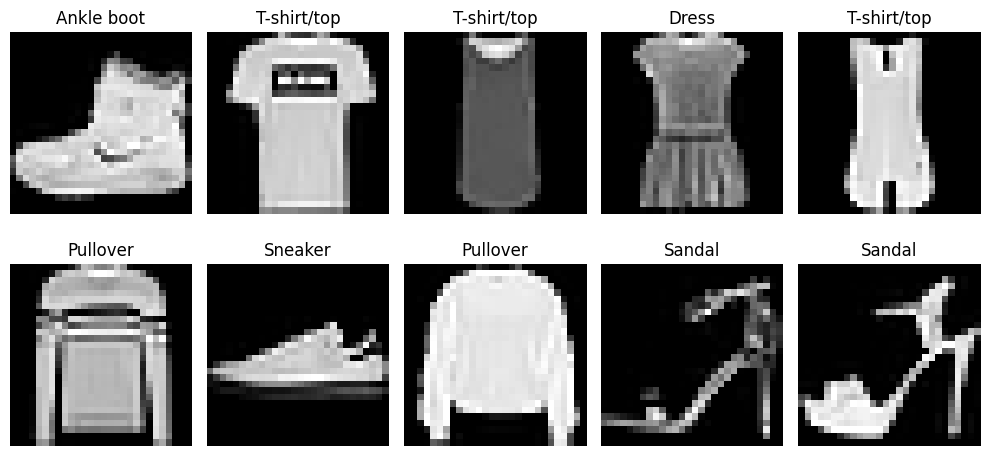

In [2]:
# 2. Visualize Some Sample Images
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [3]:
# 3. Build the CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()

# 4. Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 5. Train the Model
history = model.fit(x_train, y_train_cat, epochs=10, validation_split=0.2, batch_size=64)



/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       346,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 347,146 (1.32 MB)

 Trainable params: 347,146 (1.32 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 24s 29ms/step - accuracy: 0.7679 - loss: 0.6639 - val_accuracy: 0.8712 - val_loss: 0.3644
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 23s 30ms/step - accuracy: 0.8884 - loss: 0.3182 - val_accuracy: 0.8903 - val_loss: 0.3111
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 23s 30ms/step - accuracy: 0.9017 - loss: 0.2729 - val_accuracy: 0.8966 - val_loss: 0.2916
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 22s 30ms/step - accuracy: 0.9120 - loss: 0.2391 - val_accuracy: 0.8893 - val_loss: 0.3060
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 30ms/step - accuracy: 0.9201 - loss: 0.2202 - val_accuracy: 0.9103 - val_loss: 0.2546
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 23s 30ms/step - accuracy: 0.9315 - loss: 0.1915 - val_accuracy: 0.9104 - val_loss: 0.2508
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 22s 30ms/step - accuracy: 0.9361 - loss: 0.1738 - val_accuracy: 0.9068 - val_loss: 0.2642
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 23s 31ms/step - accuracy: 0.9416 - loss: 0.1573 - 

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9077 - loss: 0.2774

Test Accuracy: 0.9080


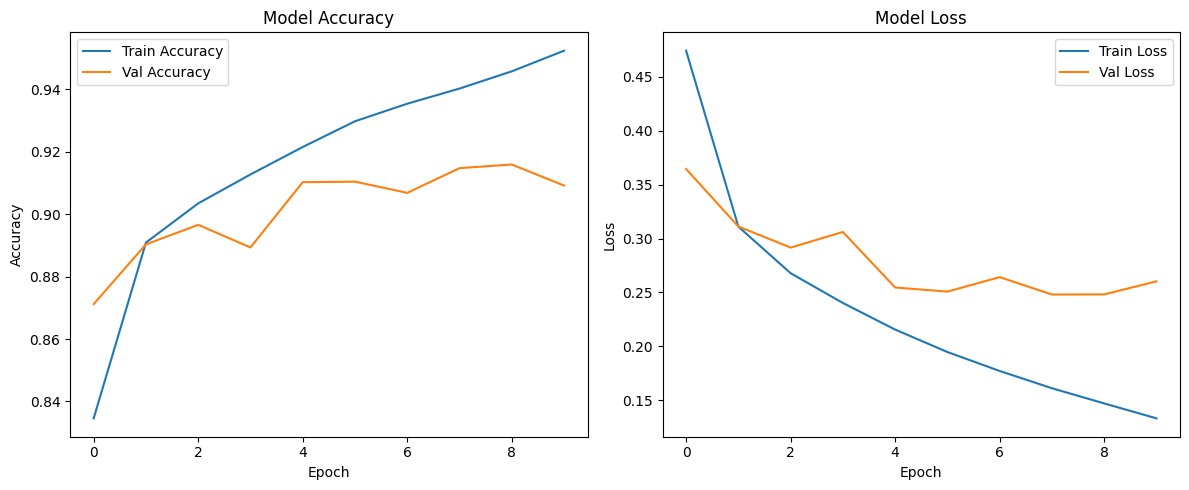

In [4]:
# 6. Evaluate on Test Set
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(f"\nTest Accuracy: {test_acc:.4f}")

# 7. Plot Accuracy and Loss Curves
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

Answers

**1. How do convolutional filters influence feature extraction in a CNN model? Which layer contributes the most to accurate clothing classification?**

    *	Convolutional filters act like small sliding windows (kernels) that scan across the image. Each filter detects specific patterns such as edges, curves, textures, or shapes. Early layers usually capture low-level features (edges, lines, corners), while deeper layers capture high-level features (buttons, collars, textures of clothing).
	  * In CNNs, the convolutional layers are critical because they extract hierarchical representations of clothing images. However, the final dense (fully connected) layers contribute the most to accurate classification, because they combine extracted features into a decision (e.g., “T-shirt vs. Pullover”).
	  * In practice: convolutions extract features, while the dense layer maps them to classes. Without strong convolutional feature extraction, the dense layer cannot classify accurately.


In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       346,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,041,440 (3.97 MB)

 Trainable params: 347,146 (1.32 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 694,294 (2.65 MB)

Interpretation:

  *	Conv layers (Conv2D): extract clothing patterns (edges → sleeves → collars).
  *	Dense layer (Dense_1): decides final class (most critical for classification).

**2. If the training accuracy is high but validation accuracy is low, what does it imply about model generalization?**

* This indicates a generalization gap: the model has memorized training data patterns but fails to perform on unseen data.
* In the clothing classification context, it suggests the CNN might have overfitted to specific training samples (e.g., learning noise, wrinkles, or shadows unique to the training set).
* Generalization can be improved with regularization (dropout, weight decay), data augmentation (rotations, flips), or early stopping.


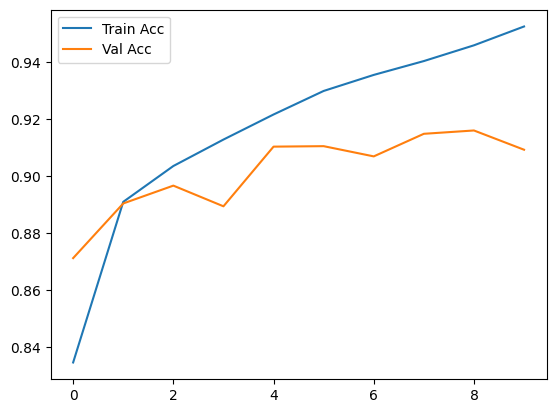

In [6]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()

**3. If increasing epochs leads to worse validation performance, what could be happening?**

* This is a clear sign of overfitting. As the model trains longer:
* Training accuracy keeps increasing (memorization).
* Validation accuracy decreases because the model is fitting noise rather than generalizable clothing patterns.
* Example: The CNN may perfectly identify training T-shirts but misclassify new T-shirts in validation because it has learned overly specific details.
* Solution: Use early stopping, tune learning rate, or apply dropout to prevent excessive fitting.

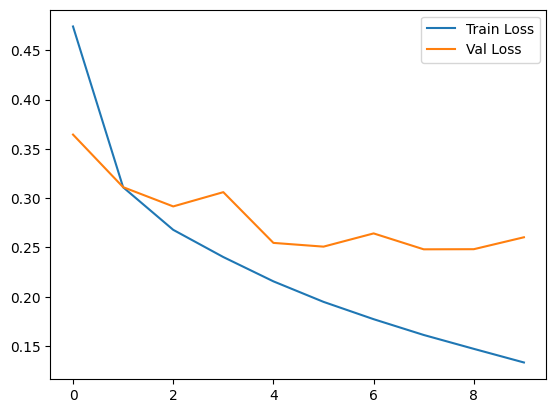

In [7]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()

**4. If test accuracy fluctuates significantly with retraining, what does that say about model robustness?**
	  
* Significant fluctuations in test accuracy suggest that the model is not robust and is sensitive to random initialization or data splits.
* In CNNs, this means that small differences in weight initialization or mini-batch order cause very different results, which implies the model lacks stability.
* Practical fixes:
   * Collect more training data.
   * Apply cross-validation for more reliable evaluation.
   * Use ensemble methods (averaging predictions of multiple CNNs) to reduce variance.

--END--